In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib notebook

import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import xarray as xr

import pims
from pims import ND2_Reader

import sys
sys.path.append("C:/Users/Ryan/Documents/GitHub/trackpy")
import trackpy as tp

import pickle

In [4]:
with open(r"210624_Vimentin_m04_p06_A_TRAJECTORY.pkl", "rb") as input_file:
    tA = pickle.load(input_file)
with open(r"210624_Vimentin_m04_p06_A001_TRAJECTORY.pkl", "rb") as input_file:
    tA1 = pickle.load(input_file)
with open(r"210624_Vimentin_m04_p06_B_TRAJECTORY.pkl", "rb") as input_file:
    tB = pickle.load(input_file)
with open(r"210624_Vimentin_m04_p06_B001_TRAJECTORY.pkl", "rb") as input_file:
    tB1 = pickle.load(input_file)

In [5]:
imxA = tp.imsd(tA, 0.13, 99.92, max_lagtime=1000, statistic='<x>')
imyA = tp.imsd(tA, 0.13, 99.92, max_lagtime=1000, statistic='<y>')

imxA1 = tp.imsd(tA1, 0.13, 99.92, max_lagtime=1000, statistic='<x>')
imyA1 = tp.imsd(tA1, 0.13, 99.92, max_lagtime=1000, statistic='<y>')

imxB = tp.imsd(tB, 0.13, 99.92, max_lagtime=1000, statistic='<x>')
imyB = tp.imsd(tB, 0.13, 99.92, max_lagtime=1000, statistic='<y>')

imxB1 = tp.imsd(tB1, 0.13, 99.92, max_lagtime=1000, statistic='<x>')
imyB1 = tp.imsd(tB1, 0.13, 99.92, max_lagtime=1000, statistic='<y>')

In [22]:
isf = np.zeros((5,1000),dtype=np.complex128)
isf_std = np.zeros_like(isf)
isf_stderr = np.zeros_like(isf)
q = 2*np.sqrt(2)
count=0

qs = np.array([1.98,3.02,3.96,5.0,6.04])

for j in range(5):
    q = qs[j]*np.pi/2
    for i in range(1000):
        count=0
        temp = []
        for particle in imxA.keys():
            if not np.isnan(imxA[particle].values[i]):
                temp.append(np.exp(-1j*q*imxA[particle].values[i]))
                temp.append(np.exp(1j*q*imxA[particle].values[i]))
                temp.append(np.exp(-1j*q*imyA[particle].values[i]))
                temp.append(np.exp(-1j*q*np.sqrt(1./2)*imxA[particle].values[i])*np.exp(-1j*q*np.sqrt(1./2)*imyA[particle].values[i]))
        for particle in imxA1.keys():
            if not np.isnan(imxA1[particle].values[i]):
                temp.append(np.exp(-1j*q*imxA1[particle].values[i]))
                temp.append(np.exp(1j*q*imxA1[particle].values[i]))
                temp.append(np.exp(-1j*q*imyA1[particle].values[i]))
                temp.append(np.exp(-1j*q*np.sqrt(1./2)*imxA1[particle].values[i])*np.exp(-1j*q*np.sqrt(1./2)*imyA1[particle].values[i]))
        for particle in imxB.keys():
            if not np.isnan(imxB[particle].values[i]):
                temp.append(np.exp(-1j*q*imxB[particle].values[i]))
                temp.append(np.exp(1j*q*imxB[particle].values[i]))
                temp.append(np.exp(-1j*q*imyB[particle].values[i]))
                temp.append(np.exp(-1j*q*np.sqrt(1./2)*imxB[particle].values[i])*np.exp(-1j*q*np.sqrt(1./2)*imyB[particle].values[i]))
        for particle in imxB1.keys():
            if not np.isnan(imxB1[particle].values[i]):
                temp.append(np.exp(-1j*q*imxB1[particle].values[i]))
                temp.append(np.exp(1j*q*imxB1[particle].values[i]))
                temp.append(np.exp(-1j*q*imyB1[particle].values[i]))
                temp.append(np.exp(-1j*q*np.sqrt(1./2)*imxB1[particle].values[i])*np.exp(-1j*q*np.sqrt(1./2)*imyB1[particle].values[i]))
        isf[j,i] = np.mean(temp)
        isf_std[j,i] = np.std(temp)
        isf_stderr[j,i] = np.std(temp)/np.sqrt(len(temp)/4)
        #isf[i] = isf[i]/count

<IPython.core.display.Javascript object>


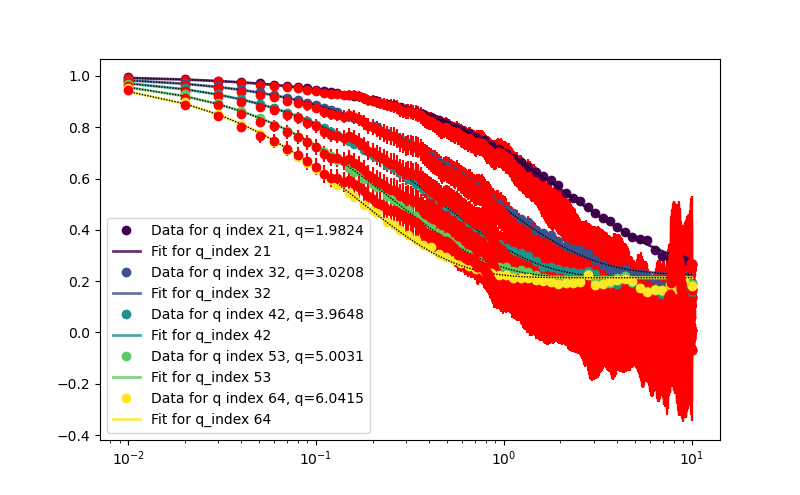

C:\Users\Ryan\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Ryan\anaconda3\lib\site-packages\numpy\ma\core.py:3379: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\Ryan\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Ryan\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Ryan\anaconda3\lib\site-packages\numpy\ma\core.py:3379: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\Ryan\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards

In [23]:
usernm = 'Ryan'
fit_saved_dir = "C:/Users/%s/Dropbox/ManuscriptsInProgress/DDM of cytoskeleton - JoVE/Data/" % usernm
fit04_06_A = xr.open_dataset(fit_saved_dir+"ddm_fits/fit04_06_A.nc")
fit04_06_A1 = xr.open_dataset(fit_saved_dir+"ddm_fits/fit04_06_A1.nc")
fit04_06_B = xr.open_dataset(fit_saved_dir+"ddm_fits/fit04_06_B.nc")
fit04_06_B1 = xr.open_dataset(fit_saved_dir+"ddm_fits/fit04_06_B1.nc")

cmap = plt.get_cmap("viridis") 

fig_width = 8
markersize = 6 #was 1
fig, ax = plt.subplots(nrows=1, figsize=(fig_width,fig_width/1.618))
data = 0.25 * (fit04_06_A.isf_data + fit04_06_A1.isf_data + fit04_06_B.isf_data + fit04_06_B1.isf_data)
theory = 0.25 * (fit04_06_A.theory + fit04_06_A1.theory + fit04_06_B.theory + fit04_06_B1.theory)
times = fit04_06_A.lagtime
q = fit04_06_A.q    
xlabel_str = "Lag time (s)"
ylabel_str = "ISF"

#q_index_to_plot = np.arange(12,100,7)
q_index_to_plot = np.array([21,32,42,53,64])
clrs = np.linspace(0,1,len(q_index_to_plot))
for i,qv in enumerate([21,32,42,53,64]):
    plt_color = cmap(clrs[i])
    qv = int(qv)

    ax.semilogx(times, data[:,qv], 'o', ms=markersize, color=plt_color, label="Data for q index %i, q=%.4f" % (qv, q[qv]))
    ax.semilogx(times, theory[:,qv], '-', color=plt_color, lw=2, alpha=0.8, label="Fit for q_index %i" % qv)
    ax.semilogx(times, theory[:,qv], color='k', linestyle=(0, (1, 1)), lw=1)
    
    ax.semilogx(imxA.index, isf[i,:], 'ro')
    ax.errorbar(imxA.index, isf[i,:], yerr=isf_stderr[i,:], fmt='none', color='r')

plt.legend()

#plt.semilogx(imxA.index, isf, 'ro')
#plt.errorbar(imxA.index, isf, yerr=isf_stderr, fmt='none', color='r')

Mentions getting the ISF from single particle tracking data:
https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.121.078001


In [56]:
isf = np.zeros((5,1000),dtype=np.complex128)
isf_std = np.zeros_like(isf)
isf_stderr = np.zeros_like(isf)
q = 2*np.sqrt(2)
count=0

qs = np.array([1.98,3.02,3.96,5.0,6.04])

for j in range(5):
    q = qs[j]#*np.pi/2
    
    qx = np.arange(0, q, 0.1)
    qy = np.sqrt(q**2 - qx**2)
    
    for i in range(1000):
        count=0
        temp = []
        for particle in imxA.keys():
            if not np.isnan(imxA[particle].values[i]):
                temp2 = []
                for qi in range(len(qx)):
                    temp2.append(np.exp(-1j*(qx[qi]*imxA[particle].values[i]+qy[qi]*imyA[particle].values[i])))
                    temp2.append(np.exp(-1j*(qx[qi]*imxA[particle].values[i]-qy[qi]*imyA[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxA[particle].values[i]+qy[qi]*imyA[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxA[particle].values[i]-qy[qi]*imyA[particle].values[i])))
                temp.append(np.mean(temp2))
       
        for particle in imxA1.keys():
            if not np.isnan(imxA1[particle].values[i]):
                temp2 = []
                for qi in range(len(qx)):
                    temp2.append(np.exp(-1j*(qx[qi]*imxA1[particle].values[i]+qy[qi]*imyA1[particle].values[i])))
                    temp2.append(np.exp(-1j*(qx[qi]*imxA1[particle].values[i]-qy[qi]*imyA1[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxA1[particle].values[i]+qy[qi]*imyA1[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxA1[particle].values[i]-qy[qi]*imyA1[particle].values[i])))
                temp.append(np.mean(temp2))
                    
        for particle in imxB.keys():
            if not np.isnan(imxB[particle].values[i]):
                temp2 = []
                for qi in range(len(qx)):
                    temp2.append(np.exp(-1j*(qx[qi]*imxB[particle].values[i]+qy[qi]*imyB[particle].values[i])))
                    temp2.append(np.exp(-1j*(qx[qi]*imxB[particle].values[i]-qy[qi]*imyB[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxB[particle].values[i]+qy[qi]*imyB[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxB[particle].values[i]-qy[qi]*imyB[particle].values[i])))
                temp.append(np.mean(temp2))
                    
        for particle in imxB1.keys():
            if not np.isnan(imxB1[particle].values[i]):
                temp2 = []
                for qi in range(len(qx)):
                    temp2.append(np.exp(-1j*(qx[qi]*imxB1[particle].values[i]+qy[qi]*imyB1[particle].values[i])))
                    temp2.append(np.exp(-1j*(qx[qi]*imxB1[particle].values[i]-qy[qi]*imyB1[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxB1[particle].values[i]+qy[qi]*imyB1[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxB1[particle].values[i]-qy[qi]*imyB1[particle].values[i])))
                temp.append(np.mean(temp2))
          
        isf[j,i] = np.mean(temp)
        isf_std[j,i] = np.std(temp)
        isf_stderr[j,i] = np.std(temp)/np.sqrt(len(temp))
        #isf[i] = isf[i]/count

<IPython.core.display.Javascript object>


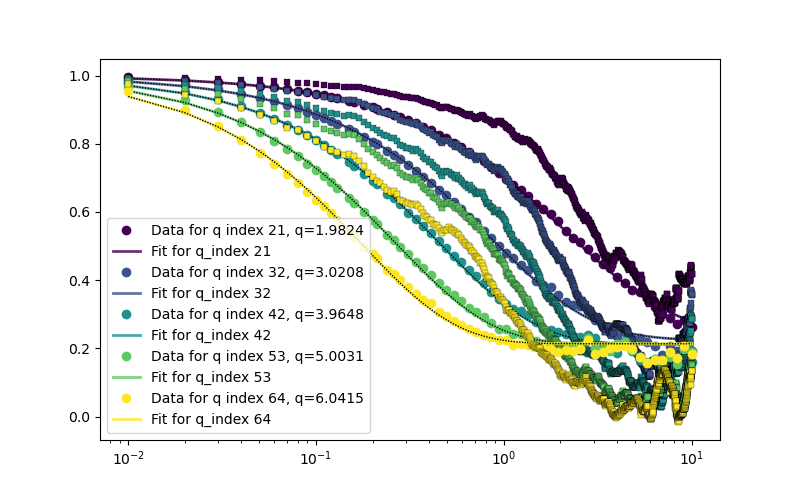

In [62]:
fig_width = 8
markersize = 6 #was 1
fig, ax = plt.subplots(nrows=1, figsize=(fig_width,fig_width/1.618))
data = 0.25 * (fit04_06_A.isf_data + fit04_06_A1.isf_data + fit04_06_B.isf_data + fit04_06_B1.isf_data)
theory = 0.25 * (fit04_06_A.theory + fit04_06_A1.theory + fit04_06_B.theory + fit04_06_B1.theory)
times = fit04_06_A.lagtime
q = fit04_06_A.q    
xlabel_str = "Lag time (s)"
ylabel_str = "ISF"

#q_index_to_plot = np.arange(12,100,7)
q_index_to_plot = np.array([21,32,42,53,64])
clrs = np.linspace(0,1,len(q_index_to_plot))
for i,qv in enumerate([21,32,42,53,64]):
    plt_color = cmap(clrs[i])
    qv = int(qv)

    ax.semilogx(times, data[:,qv], 'o', ms=markersize, color=plt_color, label="Data for q index %i, q=%.4f" % (qv, q[qv]))
    ax.semilogx(times, theory[:,qv], '-', color=plt_color, lw=2, alpha=0.8, label="Fit for q_index %i" % qv)
    ax.semilogx(times, theory[:,qv], color='k', linestyle=(0, (1, 1)), lw=1)
    
    #ax.semilogx(imxA.index, (isf[i,:]*np.conj(isf[i,:]))**1, 's', ms=4, color=plt_color, mec='k', mew=0.2)
    #ax.errorbar(imxA.index, (isf[i,:]*np.conj(isf[i,:]))**1, yerr=isf_stderr[i,:], fmt='none', color=plt_color, lw=1)
    
    ax.semilogx(imxA.index, np.real(isf[i,:]), 's', ms=4, color=plt_color, mec='k', mew=0.2)

plt.legend()

#plt.semilogx(imxA.index, isf, 'ro')
#plt.errorbar(imxA.index, isf, yerr=isf_stderr, fmt='none', color='r')

In [28]:
qx

array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ])

In [42]:
(isf[0,:]*np.conj(isf[0,:]))**1

array([0.99433325+0.j, 0.98545586+0.j, 0.98063175+0.j, 0.97577319+0.j,
       0.97270939+0.j, 0.96829063+0.j, 0.96313923+0.j, 0.96142936+0.j,
       0.95706479+0.j, 0.95076363+0.j, 0.94397622+0.j, 0.94242234+0.j,
       0.93817931+0.j, 0.93608203+0.j, 0.93787002+0.j, 0.94128164+0.j,
       0.93665248+0.j, 0.93152267+0.j, 0.92375142+0.j, 0.92248   +0.j,
       0.91858848+0.j, 0.9129909 +0.j, 0.91099949+0.j, 0.91096076+0.j,
       0.90612496+0.j, 0.90523355+0.j, 0.90045509+0.j, 0.89240224+0.j,
       0.88877139+0.j, 0.88544475+0.j, 0.88462488+0.j, 0.88114999+0.j,
       0.87703312+0.j, 0.87918621+0.j, 0.87418093+0.j, 0.87153811+0.j,
       0.86357467+0.j, 0.85759105+0.j, 0.85593319+0.j, 0.85121036+0.j,
       0.8503655 +0.j, 0.84541261+0.j, 0.84231447+0.j, 0.83836191+0.j,
       0.83209077+0.j, 0.8242234 +0.j, 0.82409058+0.j, 0.83238894+0.j,
       0.83227798+0.j, 0.82921359+0.j, 0.82633196+0.j, 0.82066746+0.j,
       0.81519894+0.j, 0.80977387+0.j, 0.80384317+0.j, 0.80447604+0.j,
      

In [48]:
qx

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. ])

In [51]:
isf[1,:]

array([0.85529362+4.51380484e-02j, 0.84566286+4.68672983e-02j,
       0.84126504+4.54039525e-02j, 0.83577303+4.54485819e-02j,
       0.83236907+4.48459240e-02j, 0.82536314+4.53821059e-02j,
       0.82389843+4.48406763e-02j, 0.82006126+4.53696555e-02j,
       0.81619272+4.66977216e-02j, 0.80846275+4.54271959e-02j,
       0.80441805+4.30211218e-02j, 0.80202062+4.46694766e-02j,
       0.8017679 +4.32124072e-02j, 0.80022651+4.17261164e-02j,
       0.80264456+4.07265593e-02j, 0.80252835+4.20613666e-02j,
       0.79710033+4.19183003e-02j, 0.79214446+4.16126103e-02j,
       0.78580049+4.18000565e-02j, 0.78136164+4.21633524e-02j,
       0.77596938+4.17777067e-02j, 0.77359589+4.01565318e-02j,
       0.77064944+4.11379897e-02j, 0.76902728+4.22373634e-02j,
       0.76633259+4.28799592e-02j, 0.76613825+4.20710512e-02j,
       0.76056986+4.20172105e-02j, 0.7526964 +4.20034078e-02j,
       0.75097318+4.09889965e-02j, 0.74719777+4.18784507e-02j,
       0.74461821+4.27536993e-02j, 0.74305569+4.1246503